In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition'
                 '/master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [17]:
X = df[['RM']].values
y = df['MEDV'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)

In [25]:
import numpy as np
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD(n_iter = 10)
lr.fit(X_std, y_std)

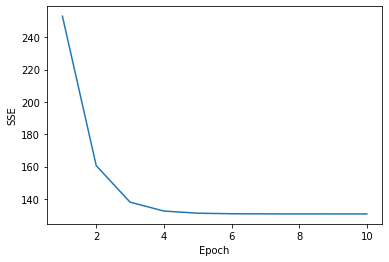

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [22]:
lr.cost_

[252.99999999999994,
 160.52145703330268,
 137.95336332188174,
 132.4459360049214,
 131.1019254721997,
 130.7739385178364,
 130.6938978934414,
 130.67436509962653,
 130.66959839475513,
 130.66843514716516,
 130.66815127287626,
 130.66808199733032,
 130.66806509160318,
 130.6680609659971,
 130.66805995920078,
 130.6680597135062,
 130.66805965354786,
 130.66805963891588,
 130.66805963534514,
 130.66805963447376]

In [27]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'steelblue', edgecolor = 'white', s = 70)
    plt.plot(X, model.predict(X), color = 'black', lw = 2)
    return None

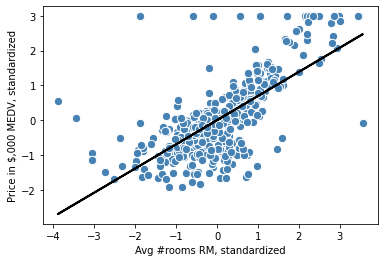

In [28]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Avg #rooms RM, standardized')
plt.ylabel('Price in $,000 MEDV, standardized')
plt.show()

In [31]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 10.850


In [34]:
#show slope
lr.w_[1]

0.694758109687889

In [35]:
#show intercept
lr.w_[0]

-4.831690603168682e-16

### Using Scikit-learn

In [36]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {}'.format(slr.coef_[0]))
print('Intercept: {}'.format(slr.intercept_))

Slope: 9.10210898118031
Intercept: -34.67062077643857


### Robust regression using RANSAC (RANdom SAmple Consesus)

In [48]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         residual_threshold=5.0,
                         random_state=0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(), min_samples=50,
                random_state=0, residual_threshold=5.0)

In [44]:
w = np.zeros(X.shape[1])
w

array([0.])

In [45]:
np.linalg.inv(np.dot(Xb.T, Xb))

array([[ 0.160404  , -0.02520874],
       [-0.02520874,  0.00401117]])

In [47]:
np.dot(Xb.T, Xb)

array([[  506.      ,  3180.025   ],
       [ 3180.025   , 20234.598247]])